In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from ISLP.bart import BART
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin
import statsmodels.api as sm
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay
from sklearn.cross_decomposition import PLSRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import sklearn.model_selection as skm
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_validate, KFold, ShuffleSplit, LeaveOneOut

from sklearn.linear_model import LogisticRegression
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:

def process_features(df_features):
    label_encoder = LabelEncoder()
    df: pd.DataFrame = df_features.copy()
    df["HomePlanet"] = label_encoder.fit_transform(df["HomePlanet"])
    df["Destination"] = label_encoder.fit_transform(df["Destination"])
    df["Cabin"] = df["Cabin"].fillna("A/0/S")
    df["Cabin_number"] = df["Cabin"].map(lambda x: float(x.split("/")[1]))
    df["Cabin_side"] = df["Cabin"].map(lambda x: float(x.split("/")[2] == "S"))
    df["Deck"] = df["Cabin"].map(lambda x: x.split("/")[0])
    df["Deck"] = label_encoder.fit_transform(df["Deck"])
    df.drop("Cabin",axis=1,inplace=True)
    df["VIP"] = df["VIP"].map(lambda x: 1.0 if x else 0.0)
    df.drop(["Name"],axis=1,inplace=True)
    df["CryoSleep"] = df["CryoSleep"].map(lambda x: 1.0 if x else 0.0)
    df = df.fillna(0)
    return df
    

In [3]:
data = pd.read_csv("train.csv")
train_df = data.dropna().copy()
train_df["HomePlanet"].unique()
train_df = process_features(train_df)

label_encoder = LabelEncoder()


In [104]:
train_df

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_number,Cabin_side,Deck
0,0001_01,1,0.0,2,39.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0,1
1,0002_01,0,0.0,2,24.0,0.0,109.0,9.0,25.0,549.0,44.0,True,0.0,1.0,5
2,0003_01,1,0.0,2,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,False,0.0,1.0,0
3,0003_02,1,0.0,2,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,False,0.0,1.0,0
4,0004_01,0,0.0,2,16.0,0.0,303.0,70.0,151.0,565.0,2.0,True,1.0,1.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1,0.0,0,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,False,98.0,0.0,0
8689,9278_01,0,1.0,1,18.0,0.0,0.0,0.0,0.0,0.0,0.0,False,1499.0,1.0,6
8690,9279_01,0,0.0,2,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,True,1500.0,1.0,6
8691,9280_01,1,0.0,0,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0,False,608.0,1.0,4


In [107]:
train_df["Deck"].unique()

array([1, 5, 0, 6, 4, 2, 3, 7])

In [108]:
train_df

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_number,Cabin_side,Deck
0,0001_01,1,0.0,2,39.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0,1
1,0002_01,0,0.0,2,24.0,0.0,109.0,9.0,25.0,549.0,44.0,True,0.0,1.0,5
2,0003_01,1,0.0,2,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,False,0.0,1.0,0
3,0003_02,1,0.0,2,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,False,0.0,1.0,0
4,0004_01,0,0.0,2,16.0,0.0,303.0,70.0,151.0,565.0,2.0,True,1.0,1.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1,0.0,0,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,False,98.0,0.0,0
8689,9278_01,0,1.0,1,18.0,0.0,0.0,0.0,0.0,0.0,0.0,False,1499.0,1.0,6
8690,9279_01,0,0.0,2,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,True,1500.0,1.0,6
8691,9280_01,1,0.0,0,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0,False,608.0,1.0,4


In [4]:
train_df["VIP"] = train_df["VIP"].map(lambda x: 1.0 if x else 0.0)

In [110]:
# train_df.drop(["Name", "PassengerId"],axis=1,inplace=True)

In [111]:
train_df.corr()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_number,Cabin_side,Deck
PassengerId,1.000000,-0.003667,-0.003173,-0.019615,-0.006417,0.014938,-0.003498,-0.006318,0.020017,-0.010564,0.006962,0.023216,0.677844,-0.010610,0.002316
HomePlanet,-0.003667,1.000000,0.081138,0.042933,0.140432,0.130006,0.224376,0.071919,0.116066,0.055204,0.040253,0.111806,-0.204211,-0.005892,-0.420045
CryoSleep,-0.003173,0.081138,1.000000,-0.096612,-0.085701,-0.082303,-0.255398,-0.210782,-0.228612,-0.202216,-0.199095,0.462803,-0.034108,0.015949,0.026156
Destination,-0.019615,0.042933,-0.096612,1.000000,-0.010014,-0.043718,0.055151,-0.108887,0.021464,-0.057562,-0.073714,-0.123773,0.096782,-0.003923,0.190397
Age,-0.006417,0.140432,-0.085701,-0.010014,1.000000,0.098138,0.074783,0.135844,0.042314,0.123820,0.105031,-0.082553,-0.136822,0.006239,-0.258787
VIP,0.014938,0.130006,-0.082303,-0.043718,0.098138,1.000000,0.029009,0.135386,0.013660,0.064792,0.130061,-0.042260,-0.107583,-0.009847,-0.196104
RoomService,-0.003498,0.224376,-0.255398,0.055151,0.074783,0.029009,1.000000,-0.013614,0.060478,0.012472,-0.026002,-0.247291,-0.010955,-0.019137,-0.025967
FoodCourt,-0.006318,0.071919,-0.210782,-0.108887,0.135844,0.135386,-0.013614,1.000000,-0.012320,0.215995,0.216997,0.055025,-0.186160,0.021578,-0.330981
ShoppingMall,0.020017,0.116066,-0.228612,0.021464,0.042314,0.013660,0.060478,-0.012320,1.000000,0.022168,0.000383,0.011602,0.003917,-0.015709,-0.035299
Spa,-0.010564,0.055204,-0.202216,-0.057562,0.123820,0.064792,0.012472,0.215995,0.022168,1.000000,0.149447,-0.219854,-0.135590,0.014806,-0.233928


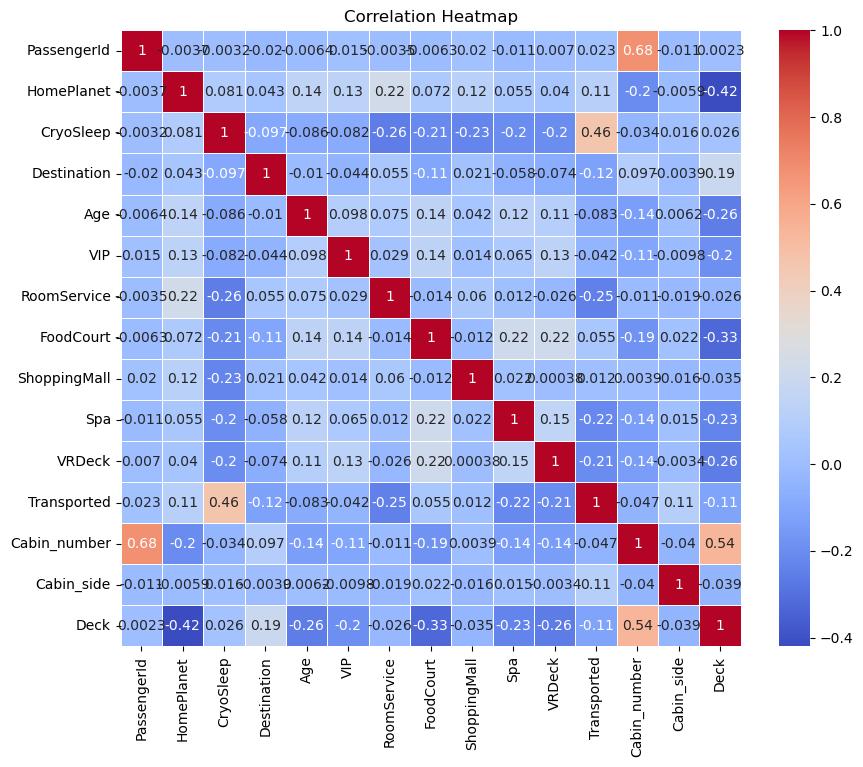

In [112]:
import seaborn as sns

plt.figure(figsize=(10, 8))
corr_matrix = train_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [5]:

(X_train ,
X_test ,
y_train ,
y_test) = train_test_split(train_df.drop(["Cabin_number", "Transported"],axis=1) ,
train_df["Transported"] ,
test_size =0.1 ,
random_state =0)
logit = LogisticRegression(C=1e10 , solver='liblinear')
logit.fit(X_train,y_train)
logit_pred = logit.predict_proba(X_test)
logit_labels = np.where(logit_pred [:,1] > 0.5, True, False)
# from sklearn.neighbors import KNeighborsClassifier

In [114]:
cv_results = cross_validate(logit, X_train, y_train, cv=KFold(n_splits=10, shuffle=True))
cv_err = np.mean(cv_results['test_score'])
cv_err

0.7804832640126758

In [115]:

cm = confusion_matrix(y_test, logit_labels)
print(cm)

[[234 110]
 [ 44 273]]


In [116]:


scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [117]:
neighbors = np.arange(1, 11)
cv = KFold(n_splits=10, shuffle=True)
cv_error = np.zeros(len(neighbors))
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    pred= knn.fit(X_train_std, y_train).predict(X_test_std)
    M_CV = cross_validate(knn,
        X_train_std,
        y_train,
        cv=cv)
    cv_error[k - 1] = np.mean(M_CV['test_score'])
print(cv_error)
# knn = KNeighborsClassifier(n_neighbors=)

[0.75525564 0.76283564 0.77511162 0.77997708 0.77847042 0.77779758
 0.78385197 0.78267549 0.78402286 0.78856634]


In [118]:
from sklearn.metrics import make_scorer, accuracy_score


k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_std, y_train)
knn_pred = knn.predict_proba(X_test_std)
def custom_knn_scorer(y_true, y_pred_probs, margin=0.5):
    # Apply margin threshold to get binary predictions
    y_pred_labels = np.where(y_pred_probs[:] > margin, 1, 0)
    return accuracy_score(y_true, y_pred_labels)
margins = np.arange(0.1, 0.9, 0.1)
cv_error = np.zeros(len(margins))
for i, margin in enumerate(margins):
    knn_scorer = make_scorer(custom_knn_scorer, margin=margin)
    M_CV = cross_validate(knn,
        X_train_std,
        y_train,
        scoring=knn_scorer,
        cv=cv)
    cv_error[i] = np.mean(M_CV['test_score'])
print(dict(zip(margins, cv_error))) # print(cv_error)

{0.1: 0.7796395325807091, 0.2: 0.7818362900715841, 0.30000000000000004: 0.7798101462807346, 0.4: 0.7796483037659507, 0.5: 0.7821778004130946, 0.6: 0.7820032255326372, 0.7000000000000001: 0.7830087994793878, 0.8: 0.7782981071216366}


In [119]:

knn = KNeighborsClassifier(n_neighbors=k)
pls = PLSRegression(n_components=2, scale=True)
# pipe = Pipeline([("pca", pca), ("knn", knn)])
pls.fit(X_train_std, y_train)
pls.predict(X_test_std)
param_grid = {'n_components': range(1, 12)}
grid = skm.GridSearchCV(pls ,
param_grid ,
cv=KFold(5),scoring='neg_mean_squared_error')
grid.fit(X_train_std, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=PLSRegression(),
             param_grid={'n_components': range(1, 12)},
             scoring='neg_mean_squared_error')

0


array([-0.16851246, -0.16274905, -0.16159273, -0.16144427, -0.16140829,
       -0.16140522, -0.16140441, -0.1614043 , -0.16140429, -0.16140428,
       -0.16140428])

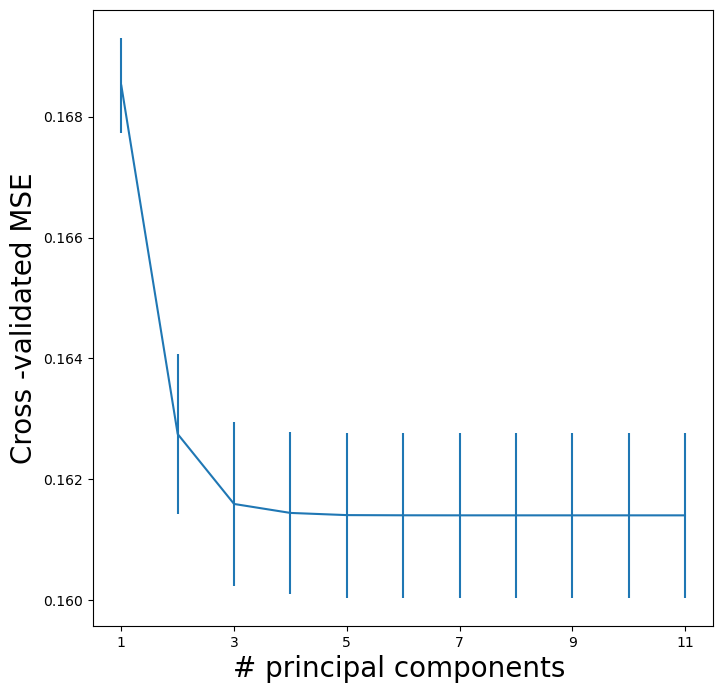

In [120]:
from matplotlib.pyplot import subplots


pls_fig , ax = subplots(figsize =(8 ,8))
n_comp = param_grid['n_components']
ax.errorbar(n_comp ,
-grid.cv_results_['mean_test_score'],
grid.cv_results_['std_test_score'] / np.sqrt(12))
ax.set_ylabel('Cross -validated MSE', fontsize =20)
ax.set_xlabel('# principal components ', fontsize =20)
ax.set_xticks(n_comp[::2])
print(np.argmin(grid.cv_results_['mean_test_score']))
grid.cv_results_['mean_test_score']

In [121]:
margin = 0.5

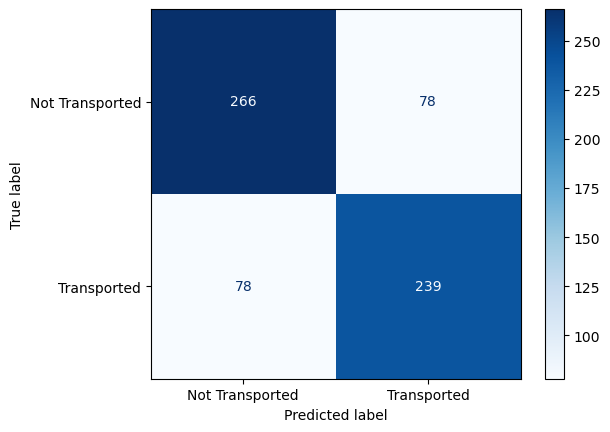

In [122]:


# Assuming y_test and y_pred from a trained kNN model
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_std, y_train)
# Confusion Matrix
cm = confusion_matrix(y_test, knn.predict_proba(X_test_std)[:, 1] > margin)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Transported', 'Transported'])
disp.plot(cmap='Blues')
plt.show()

In [123]:
glm = sm.GLM(y_train,X_train_std,family=sm.families.Binomial())
results = glm.fit()
# print(results.summary())
results.predict(X_test_std)
kf = KFold(n_splits=10, shuffle=True)
margins = np.arange(0.1, 0.9, 0.1)

for margin in margins:
    accuracy_scores = []
    for train_index, test_index in kf.split(X_train_std):
        X_train_k, X_test_k = X_train_std[train_index], X_train_std[test_index]
        y_train_k, y_test_k = y_train.iloc[train_index], y_train.iloc[test_index]
        
        # Add constant to X_train and X_test
        X_train_const = sm.add_constant(X_train_k, has_constant='add')
        X_test_const = sm.add_constant(X_test_k, has_constant='add')
        
        # Fit the GLM model
        model = sm.GLM(y_train_k, X_train_const, family=sm.families.Binomial())
        result = model.fit()
        y_pred_probs = result.predict(X_test_const)
        y_pred_labels = np.where(y_pred_probs > margin, 1, 0)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test_k, y_pred_labels)
        accuracy_scores.append(accuracy)

    print(f"Margin: {margin}, Mean accuracy: {np.mean(accuracy_scores)}")
margin = 0.4

Margin: 0.1, Mean accuracy: 0.6462549868432222
Margin: 0.2, Mean accuracy: 0.7195931301813655
Margin: 0.30000000000000004, Mean accuracy: 0.768875873581756
Margin: 0.4, Mean accuracy: 0.7920926350338114
Margin: 0.5, Mean accuracy: 0.7902455931867697
Margin: 0.6, Mean accuracy: 0.7872158560393855
Margin: 0.7000000000000001, Mean accuracy: 0.7665280253515548
Margin: 0.8, Mean accuracy: 0.7118600571541748


In [124]:


lda = LinearDiscriminantAnalysis(store_covariance=True)
lda.fit(X_train_std, y_train)
lda_pred = lda.predict(X_test_std)
accuracy_score(y_test, lda_pred)


0.7639939485627837

In [125]:


qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(X_train_std, y_train)
qda_pred = qda.predict(X_test_std)
accuracy_score(y_test, qda_pred)

0.6898638426626323

In [126]:


nb = GaussianNB()
nb.fit(X_train_std, y_train)
nb_labels = nb.predict(X_test_std)
accuracy_score(y_test, nb_labels)

0.6822995461422088

In [127]:


svm_rbf = SVC(kernel="poly",C=1e5)
kfold = skm.KFold(10,
shuffle=True)
grid = skm.GridSearchCV(svm_rbf ,
{'C':[1,10], 'kernel':['poly']},
refit=True ,
cv=kfold ,
scoring='accuracy');
grid.fit(X_train_std, y_train)
grid.best_params_


In [128]:
# C=grid.best_params_['C']
C=30
# gamma=grid.best_params_['gamma']
svm_rbf = SVC(kernel="poly", C=C)
svm_rbf.fit(X_train_std, y_train)
svm_rbf_pred = svm_rbf.predict(X_test_std)
accuracy_score(y_test, svm_rbf_pred)

0.789712556732224

In [129]:

kfold = KFold(n_splits=5, shuffle=True)
gbc = GradientBoostingClassifier(max_depth=3, learning_rate=0.001, n_estimators=5000)
grid = skm.GridSearchCV(gbc ,
{'learning_rate':[0.001, 0.01] ,
'n_estimators':[1000, 3000, 5000]},
refit=True ,
cv=kfold ,
scoring='accuracy')
grid.fit(X_train_std, y_train)
grid.best_params_

In [130]:
gbc = GradientBoostingClassifier(learning_rate=0.01, n_estimators=2000, max_depth=4)
gbc.fit(X_train_std, y_train)
pred = gbc.predict(X_test_std)
accuracy_score(y_test, pred)

0.794251134644478

In [131]:

def custom_bart_scorer(y_true, y_pred_probs, margin=0.5):
    # Apply margin threshold to get binary predictions
    y_pred_labels = np.where(y_pred_probs[:] > margin, 1.0, 0.0)
    return accuracy_score(y_true, y_pred_labels)

# Assuming BART model is initialized as bart_model
bart_model = BART()
y_train_bart = np.array(y_train, dtype=float).copy()
y_test_bart = np.array(y_test, dtype=float).copy()

# Fit the model with GridSearchCV
kfold = KFold(n_splits=5, shuffle=True)
bart_scorer = make_scorer(custom_bart_scorer)
grid = skm.GridSearchCV(estimator=bart_model,
                    param_grid={'burnin': [5, 10, 15], 'ndraw': [10, 15, 20]},
                    refit=True,
                    cv=kfold,
                    scoring=bart_scorer)

grid.fit(X_train_std, y_train_bart)
grid.best_params_

{'n_components': 10}

In [132]:
bart_model = BART()
bart_model.fit(X_train_std, y_train_bart)
bart_pred = np.where(bart_model.predict(X_test_std) > 0.5, 1.0, 0.0)
accuracy_score(y_test_bart, bart_pred)

In [133]:
gbc = GradientBoostingClassifier(learning_rate=0.001, n_estimators=5000, max_depth=3)
gbc.fit(X_train_std, y_train)
gbc_pred = gbc.predict(X_test_std)
accuracy_score(y_test, gbc_pred)

In [134]:
rf = RandomForestClassifier(n_estimators=3000)
rf.fit(X_train_std, y_train)

In [135]:
rf_pred = rf.predict(X_test_std)
accuracy_score(y_test, rf_pred)

In [136]:
kfold = KFold(n_splits=5, shuffle=True)
grid = skm.GridSearchCV(estimator=rf,
                    param_grid={'max_features': [3, 4, 5, 6], 'n_estimators': [1000, 2000, 3000]},
                    refit=True,
                    cv=kfold)
grid.fit(X_train_std, y_train)

In [137]:
grid.best_params_

In [138]:
pred = rf.predict(X_test_std)
accuracy_score(y_test, pred)

In [139]:
rf_1 = RandomForestClassifier(n_estimators=5000, max_features=3)
rf_1.fit(X_train_std, y_train)

pred = rf_1.predict(X_test_std)
accuracy_score(y_test, pred)

0.783661119515885

In [140]:
test = pd.read_csv('test.csv')
test = process_features(test)

In [141]:
test.head(1)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_number,Cabin_side,Deck
0,0013_01,0,1.0,2,27.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,6


In [142]:
X_train_std[0]

array([ 1.3256529 ,  0.41682319, -0.73984536,  0.63385972, -0.26754756,
       -0.15922804, -0.34404664,  0.30914747,  2.4509714 , -0.20762318,
        0.38777949,  0.98414585, -0.1594515 ])

In [6]:
gbc = GradientBoostingClassifier(learning_rate=0.01, n_estimators=2000, max_depth=4)
gbc.fit(train_df.drop(["PassengerId", "Transported"],axis=1), train_df["Transported"])

GradientBoostingClassifier(learning_rate=0.01, max_depth=4, n_estimators=2000)

In [144]:
res = gbc.predict(test.drop("PassengerId",axis=1))
out = pd.DataFrame({'PassengerId': test.PassengerId, 'Transported': res})
out.to_csv('submission.csv', index=False)